In [37]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [5]:
crash_data = pd.read_csv('/Users/javm/Desktop/Flatiron3/Traffic_Crashes_-_Vehicles.csv')

In [6]:
crash_data

,CRASH_UNIT_ID,CRASH_RECORD_ID,RD_NO,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,829999,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,JD124535,01/22/2020 06:25:00 AM,1,DRIVER,NaN,796949.0,NaN,INFINITI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,NaN,834816.0,NaN,HONDA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,749949,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,2,PARKED,NaN,834819.0,NaN,TOYOTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,749950,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,3,PARKED,NaN,834817.0,NaN,GENERAL MOTORS CORPORATION (GMC),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,871921,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,04/13/2020 10:50:00 PM,2,DRIVER,NaN,827212.0,NaN,BUICK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337842,1428903,95bd4beb3fc74537b067a74e5fa3d3751e5d9b85366b70...,JF413122,09/17/2022 04:00:00 PM,2,DRIVER,NaN,1357945.0,NaN,HYUNDAI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1337843,1428950,7330fac3b7ff58a70385bbc486f1b29b84bdf980f3b7f5...,JF413209,09/17/2022 06:30:00 AM,1,DRIVER,NaN,1358003.0,NaN,FORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1337844,1428951,7330fac3b7ff58a70385bbc486f1b29b84bdf980f3b7f5...,JF413209,09/17/2022 06:30:00 AM,2,PARKED,NaN,1358007.0,NaN,JEEP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1337845,1429660,9508aefdb2b41844fa8ba879d3089365f910868b5f30cd...,JF402263,09/17/2022 01:30:00 AM,1,DRIVER,NaN,1358680.0,NaN,JEEP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
crash_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337847 entries, 0 to 1337846
Data columns (total 72 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   CRASH_UNIT_ID             1337847 non-null  int64  
 1   CRASH_RECORD_ID           1337847 non-null  object 
 2   RD_NO                     1328848 non-null  object 
 3   CRASH_DATE                1337847 non-null  object 
 4   UNIT_NO                   1337847 non-null  int64  
 5   UNIT_TYPE                 1335974 non-null  object 
 6   NUM_PASSENGERS            198761 non-null   float64
 7   VEHICLE_ID                1307500 non-null  float64
 8   CMRC_VEH_I                24967 non-null    object 
 9   MAKE                      1307495 non-null  object 
 10  MODEL                     1307351 non-null  object 
 11  LIC_PLATE_STATE           1189340 non-null  object 
 12  VEHICLE_YEAR              1094573 non-null  float64
 13  VEHICLE_DEFECT            1

In [11]:
crash_data["VEHICLE_TYPE"].value_counts()

PASSENGER                                 823656
SPORT UTILITY VEHICLE (SUV)               174905
UNKNOWN/NA                                124764
VAN/MINI-VAN                               64071
PICKUP                                     40394
TRUCK - SINGLE UNIT                        24934
OTHER                                      15266
BUS OVER 15 PASS.                          13755
TRACTOR W/ SEMI-TRAILER                    12524
BUS UP TO 15 PASS.                          3162
MOTORCYCLE (OVER 150CC)                     3140
SINGLE UNIT TRUCK WITH TRAILER              1946
OTHER VEHICLE WITH TRAILER                  1677
TRACTOR W/O SEMI-TRAILER                    1672
AUTOCYCLE                                    646
MOPED OR MOTORIZED BICYCLE                   358
MOTOR DRIVEN CYCLE                           326
ALL-TERRAIN VEHICLE (ATV)                    157
FARM EQUIPMENT                                71
3-WHEELED MOTORCYCLE (2 REAR WHEELS)          48
RECREATIONAL OFF-HIG

In [12]:
crash_data["UNIT_NO"].value_counts()

1          659549
2          620971
3           44476
4            9104
5            2416
6             765
7             289
8             125
9              59
10             29
0              20
11             14
12              8
13              5
14              5
15              4
16              3
18              2
17              2
3778035         1
Name: UNIT_NO, dtype: int64

In [16]:
people_data = pd.read_csv('/Users/javm/Desktop/Flatiron3/Traffic_Crashes_-_People.csv')
people_data

/Users/javm/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (20,24,25,26,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,HY484534,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,HY484750,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,HY484778,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440438,P316543,PASSENGER,0cf549b137f00c4c6a934aa900dc88694dbd24e560e250...,JF400046,1354784.0,09/17/2022 01:56:00 AM,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1440439,P316652,PASSENGER,bc722673c24222d6860059d0e07ad3da22107cea44b84d...,JF408037,1355339.0,09/17/2022 12:48:00 AM,5.0,CHICAGO,IL,60651,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1440440,P316770,PASSENGER,79d8ebaf30b5a1329ff256ac362025a420fe23cb46a4d1...,JF408754,1355718.0,09/17/2022 12:15:00 PM,2.0,CHICAGO,IL,60639,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1440441,P317147,PASSENGER,c43c6b9ebd9eef456b5628f6d2509b72f394ff798f6298...,JF411682,1357251.0,09/17/2022 05:56:00 PM,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
people_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440443 entries, 0 to 1440442
Data columns (total 30 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_ID              1440443 non-null  object 
 1   PERSON_TYPE            1440443 non-null  object 
 2   CRASH_RECORD_ID        1440443 non-null  object 
 3   RD_NO                  1430723 non-null  object 
 4   VEHICLE_ID             1412112 non-null  float64
 5   CRASH_DATE             1440443 non-null  object 
 6   SEAT_NO                292479 non-null   float64
 7   CITY                   1053018 non-null  object 
 8   STATE                  1066676 non-null  object 
 9   ZIPCODE                962017 non-null   object 
 10  SEX                    1418152 non-null  object 
 11  AGE                    1022515 non-null  float64
 12  DRIVERS_LICENSE_STATE  847046 non-null   object 
 13  DRIVERS_LICENSE_CLASS  719328 non-null   object 
 14  SAFETY_EQUIPMENT  

In [22]:
people_data['PERSON_TYPE'].value_counts()

DRIVER                 1120121
PASSENGER               292479
PEDESTRIAN               16334
BICYCLE                  10063
NON-MOTOR VEHICLE         1188
NON-CONTACT VEHICLE        258
Name: PERSON_TYPE, dtype: int64

In [19]:
chitown_data = crash_data.merge(people_data, how = "outer" )

In [25]:
chitown_data

,CRASH_UNIT_ID,CRASH_RECORD_ID,RD_NO,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,829999,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,JD124535,01/22/2020 06:25:00 AM,1,DRIVER,NaN,796949.0,NaN,INFINITI,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,NaN,834816.0,NaN,HONDA,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,749949,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,2,PARKED,NaN,834819.0,NaN,TOYOTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,749950,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,3,PARKED,NaN,834817.0,NaN,GENERAL MOTORS CORPORATION (GMC),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,871921,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,04/13/2020 10:50:00 PM,2,DRIVER,NaN,827212.0,NaN,BUICK,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1618739,1428950,7330fac3b7ff58a70385bbc486f1b29b84bdf980f3b7f5...,JF413209,09/17/2022 06:30:00 AM,1,DRIVER,NaN,1358003.0,NaN,FORD,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1618740,1428951,7330fac3b7ff58a70385bbc486f1b29b84bdf980f3b7f5...,JF413209,09/17/2022 06:30:00 AM,2,PARKED,NaN,1358007.0,NaN,JEEP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1618741,1429660,9508aefdb2b41844fa8ba879d3089365f910868b5f30cd...,JF402263,09/17/2022 01:30:00 AM,1,DRIVER,NaN,1358680.0,NaN,JEEP,...,NaN,FOLLOWED TOO CLOSELY,NOT OBSCURED,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1618742,1429661,9508aefdb2b41844fa8ba879d3089365f910868b5f30cd...,JF402263,09/17/2022 01:30:00 AM,2,DRIVER,1.0,1358681.0,NaN,CHEVROLET,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [23]:
chitown_data['UNIT_TYPE'].value_counts()

DRIVER                 1393030
PARKED                  181650
PEDESTRIAN               18153
DRIVERLESS               11995
BICYCLE                  10300
NON-MOTOR VEHICLE         1261
NON-CONTACT VEHICLE        266
DISABLED VEHICLE           186
EQUESTRIAN                   7
Name: UNIT_TYPE, dtype: int64

In [27]:
values = ['EQUESTRIAN', 'DISABLED VEHICLE', 'NON-CONTACT VEHICLE']

In [28]:
chitown_data = chitown_data[chitown_data.UNIT_TYPE.isin(values) == False]

In [30]:
chitown_data['UNIT_TYPE'].value_counts()

DRIVER               1393030
PARKED                181650
PEDESTRIAN             18153
DRIVERLESS             11995
BICYCLE                10300
NON-MOTOR VEHICLE       1261
Name: UNIT_TYPE, dtype: int64

In [34]:
chitown_data['UNIT_TYPE'].replace('NON-MOTOR VEHICLE', 'BICYCLE', inplace = True)

In [35]:
chitown_data['UNIT_TYPE'].value_counts()

DRIVER        1393030
PARKED         181650
PEDESTRIAN      18153
DRIVERLESS      11995
BICYCLE         11561
Name: UNIT_TYPE, dtype: int64

In [36]:
chitown_data['PERSON_TYPE'].value_counts()

DRIVER                 1120610
PASSENGER               292408
PEDESTRIAN               18214
BICYCLE                  10329
NON-MOTOR VEHICLE         1272
NON-CONTACT VEHICLE          4
Name: PERSON_TYPE, dtype: int64

In [39]:
chitown_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1618285 entries, 0 to 1618743
Data columns (total 98 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   CRASH_UNIT_ID             1618285 non-null  int64  
 1   CRASH_RECORD_ID           1618285 non-null  object 
 2   RD_NO                     1607421 non-null  object 
 3   CRASH_DATE                1618285 non-null  object 
 4   UNIT_NO                   1618285 non-null  int64  
 5   UNIT_TYPE                 1616389 non-null  object 
 6   NUM_PASSENGERS            477047 non-null   float64
 7   VEHICLE_ID                1585528 non-null  float64
 8   CMRC_VEH_I                31153 non-null    object 
 9   MAKE                      1585522 non-null  object 
 10  MODEL                     1585346 non-null  object 
 11  LIC_PLATE_STATE           1460375 non-null  object 
 12  VEHICLE_YEAR              1355565 non-null  float64
 13  VEHICLE_DEFECT            1

In [2]:
perc = 95.0
min_count =  int(((100-perc)/100)*chitown_data.shape[0] + 1)
chitown_data1 = chitown_data.dropna( axis=1, 
                thresh=min_count)

NameError: name 'chitown_data' is not defined

<AxesSubplot:>

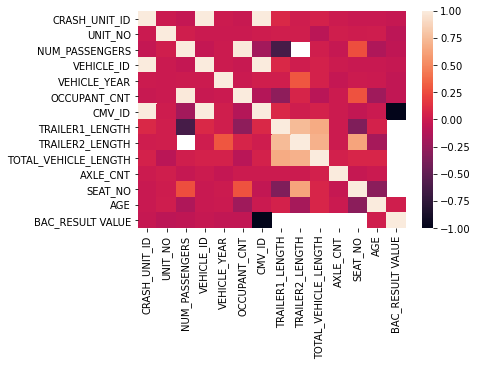

In [40]:
sns.heatmap(chitown_data.corr())

In [44]:
import plotly.express as px 
px.scatter(data_frame=chitown_data ,x = 'SEAT_NO', y = 'AGE', color = 'UNIT_TYPE' )

KeyError: (nan, '', '', '', '')

In [ ]:
px.scatter

In [24]:
X = chitown_data.drop('UNIT_TYPE', axis = 1)
y = chitown_data['UNIT_TYPE']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                   random_state=1)
# Scale the data for modeling
chitown_scaler = StandardScaler()
chitown_scaler.fit(X_train)
X_train_sc = chitown_scaler.transform(X_train)
X_test_sc = chitown_scaler.transform(X_test)

# Train a logistic regresssion model with the train data
chitown_model = LogisticRegression(random_state=42)
chitown_model.fit(X_train_sc, y_train)

ValueError: could not convert string to float: '1275dc2334522d8dea2af0f9223f40e36a171e7b0ff5f3efe4d66aebd49fd10585499acfd776cdd37490ea031040ae14c680014b765b908f34f2743d507b7e0e'